# Import Necessary Libraries and Load Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/bank_marketing/bank.csv")
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

# Basic Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

# Check for null values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df.contact.value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [7]:
cols = df.select_dtypes(np.object_).columns
cols
cat_cols = cols

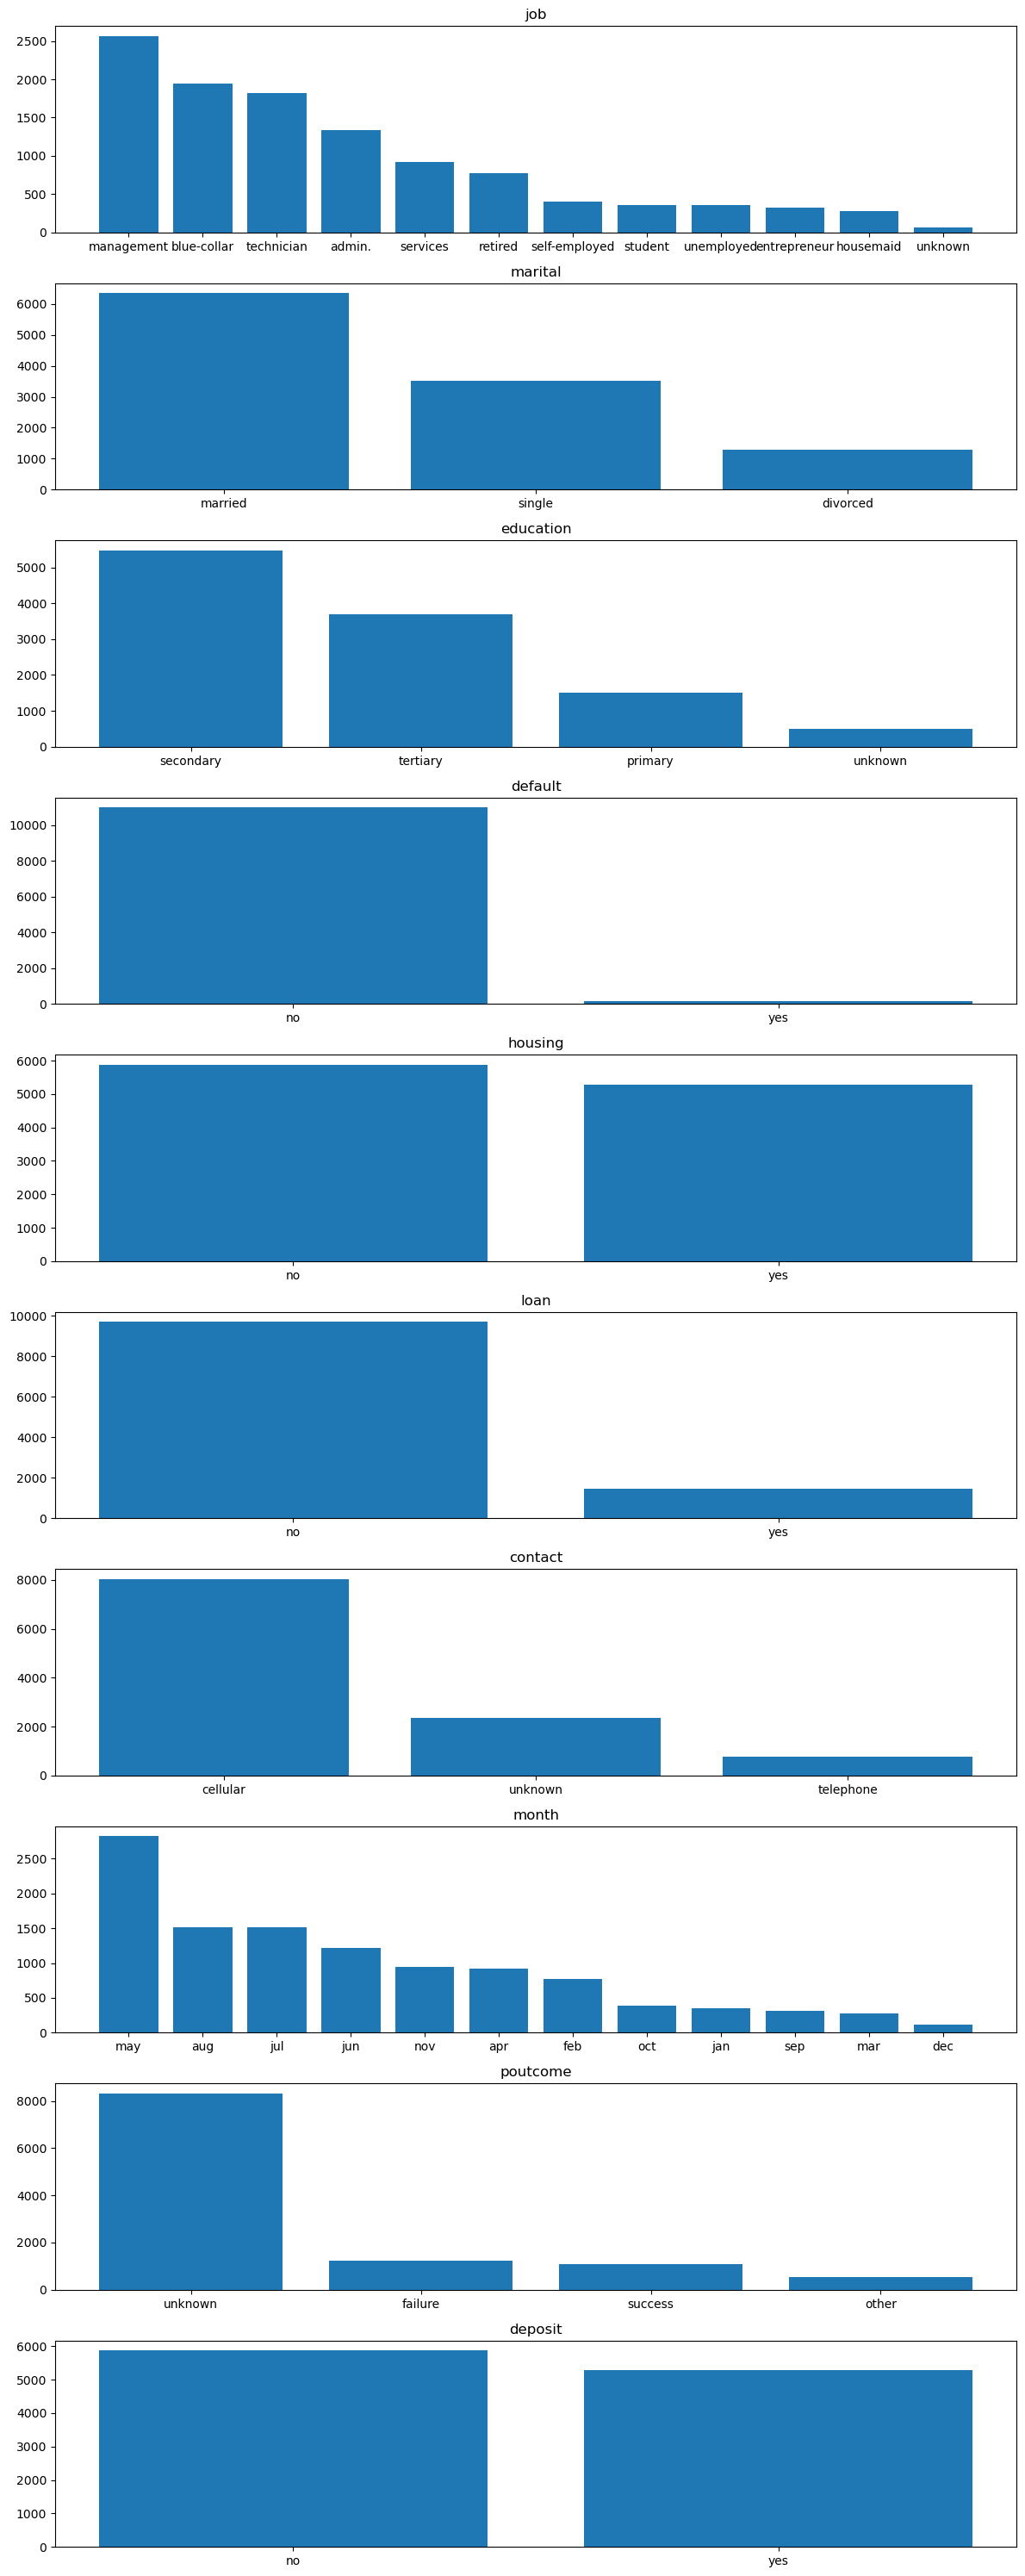

In [8]:

fig, axs = plt.subplots(nrows=len(cat_cols), figsize=(12, 30))

for ax, col in zip(axs, cat_cols): 
    counts = df[col].value_counts()
    ax.bar(counts.index, counts)
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=0)
    
fig.tight_layout()  
plt.show()

In [9]:
# we can see that there are lot of unknown's in the columns.. let fill those with mode

In [10]:
cols_with_unknown = df.columns[df.eq('unknown').any()]
cols_with_unknown

Index(['job', 'education', 'contact', 'poutcome'], dtype='object')

In [11]:
df.job.value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [12]:
mode  = df.contact.mode()[0]
print(mode)
df["contact"] = df.contact.replace("unknown",mode)
df.contact.value_counts()

cellular


contact
cellular     10388
telephone      774
Name: count, dtype: int64

In [13]:
for col in cols_with_unknown:
    mode  = df[col].mode()[0]
    df[col] = df[col].replace("unknown",mode)

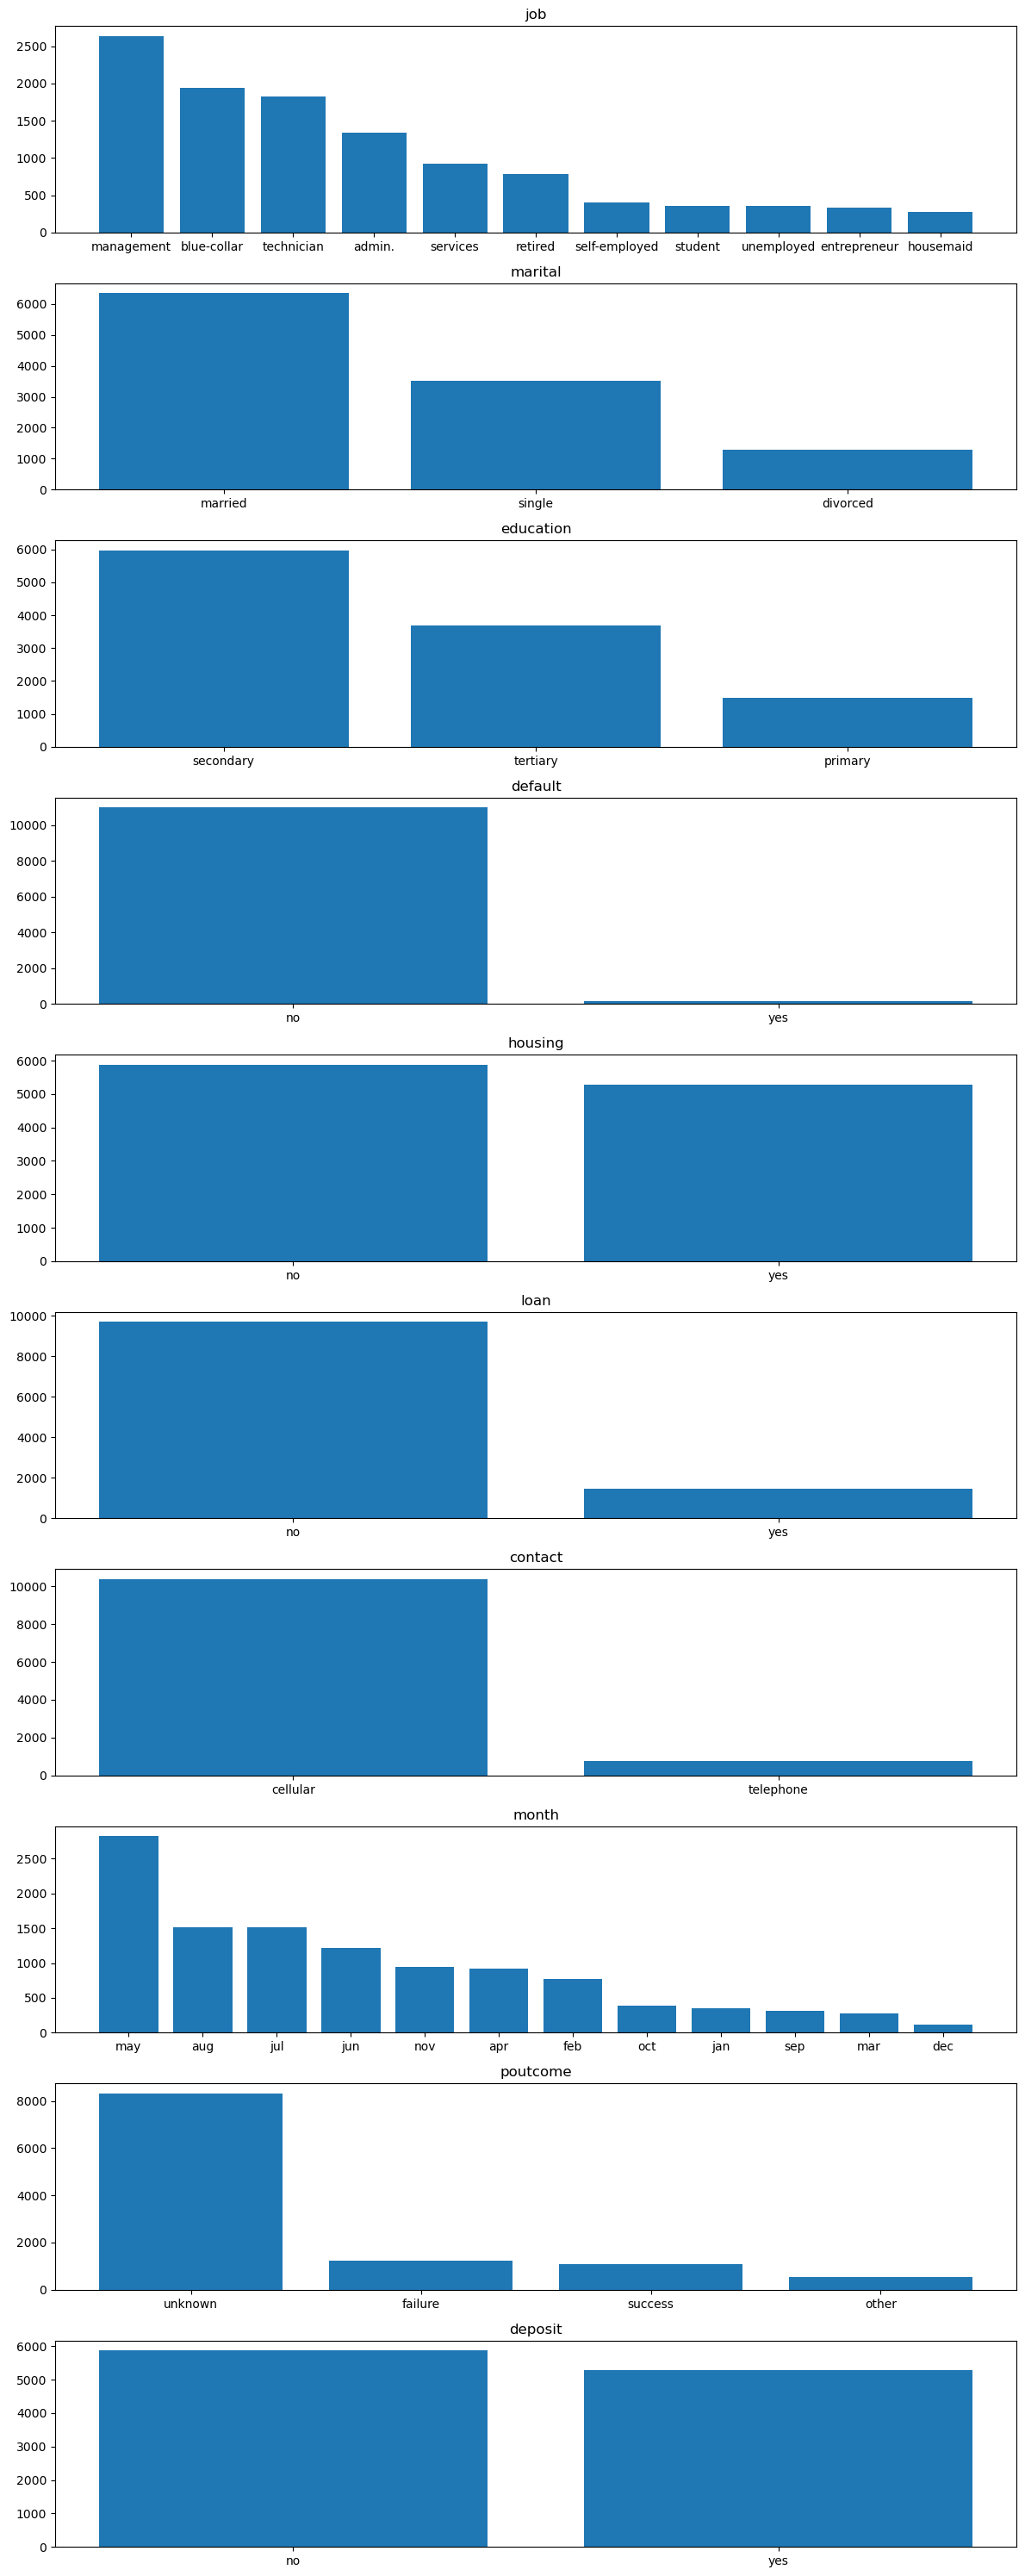

In [14]:

fig, axs = plt.subplots(nrows=len(cat_cols), figsize=(12, 30))

for ax, col in zip(axs, cat_cols): 
    counts = df[col].value_counts()
    ax.bar(counts.index, counts)
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=0)
    
fig.tight_layout()  
plt.show()

# Visualistaion

In [15]:
import matplotlib.pyplot as plt

<BarContainer object of 11 artists>

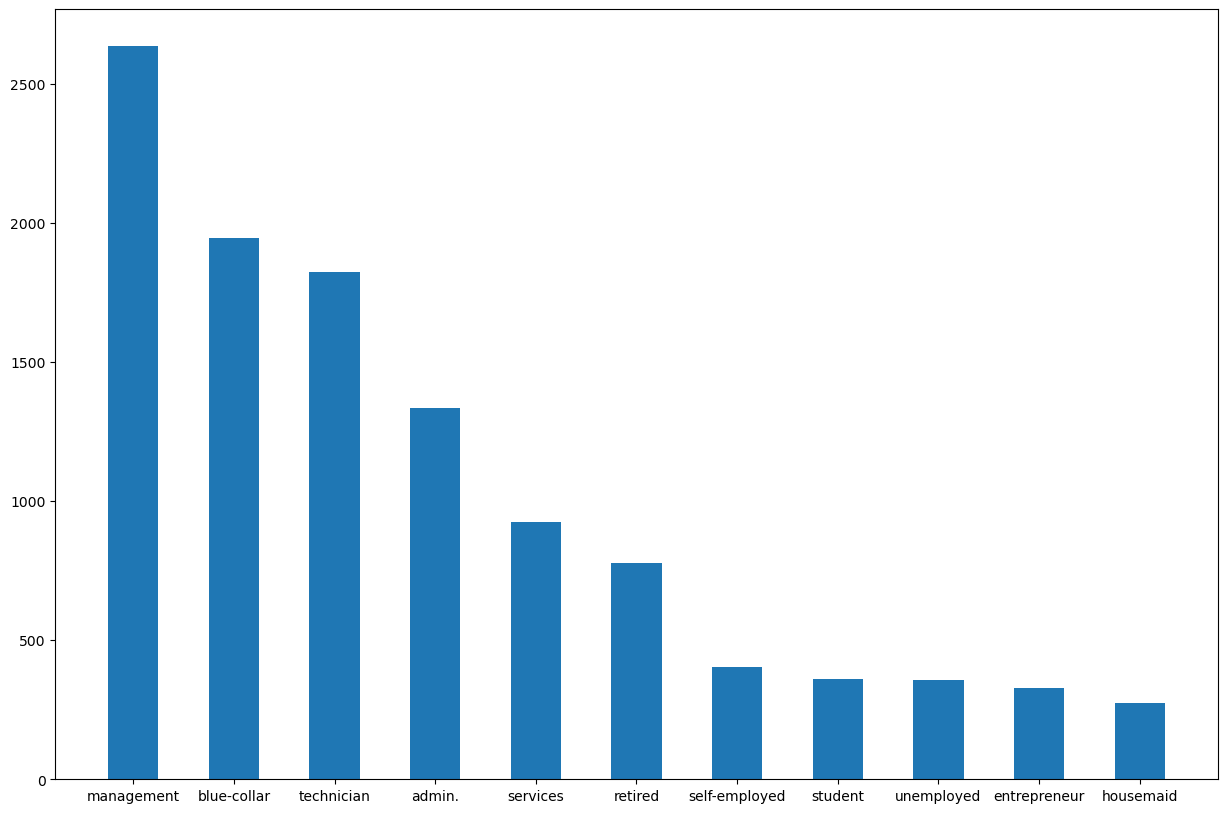

In [16]:
counts = df["job"].value_counts()
plt.figure(figsize=(15, 10)) 
plt.bar(counts.index, counts,width=0.5)

# Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(np.number).columns
for col in numerical_columns :
    df[col] = scaler.fit_transform(df[[col]])
df.head()

age         job  marital  education default   balance housing loan  \
0  0.532468      admin.  married  secondary      no  0.104371     yes   no   
1  0.493506      admin.  married  secondary      no  0.078273      no   no   
2  0.298701  technician  married  secondary      no  0.092185     yes   no   
3  0.480519    services  married  secondary      no  0.105882     yes   no   
4  0.467532      admin.  married   tertiary      no  0.079851      no   no   

    contact       day month  duration  campaign  pdays  previous poutcome  \
0  cellular  0.133333   may  0.268110  0.000000    0.0       0.0  unknown   
1  cellular  0.133333   may  0.377675  0.000000    0.0       0.0  unknown   
2  cellular  0.133333   may  0.357566  0.000000    0.0       0.0  unknown   
3  cellular  0.133333   may  0.148750  0.000000    0.0       0.0  unknown   
4  cellular  0.133333   may  0.172983  0.016129    0.0       0.0  unknown   

  deposit  
0     yes  
1     yes  
2     yes  
3     yes  
4     yes

# Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

age  job  marital  education  default   balance  housing  loan  \
0  0.532468    0        1          1        0  0.104371        1     0   
1  0.493506    0        1          1        0  0.078273        0     0   
2  0.298701    9        1          1        0  0.092185        1     0   
3  0.480519    7        1          1        0  0.105882        1     0   
4  0.467532    0        1          2        0  0.079851        0     0   

   contact       day  month  duration  campaign  pdays  previous  poutcome  \
0        0  0.133333      8  0.268110  0.000000    0.0       0.0         3   
1        0  0.133333      8  0.377675  0.000000    0.0       0.0         3   
2        0  0.133333      8  0.357566  0.000000    0.0       0.0         3   
3        0  0.133333      8  0.148750  0.000000    0.0       0.0         3   
4        0  0.133333      8  0.172983  0.016129    0.0       0.0         3   

   deposit  
0        1  
1        1  
2        1  
3        1  
4        1

In [19]:
# Let's try seing the correlation

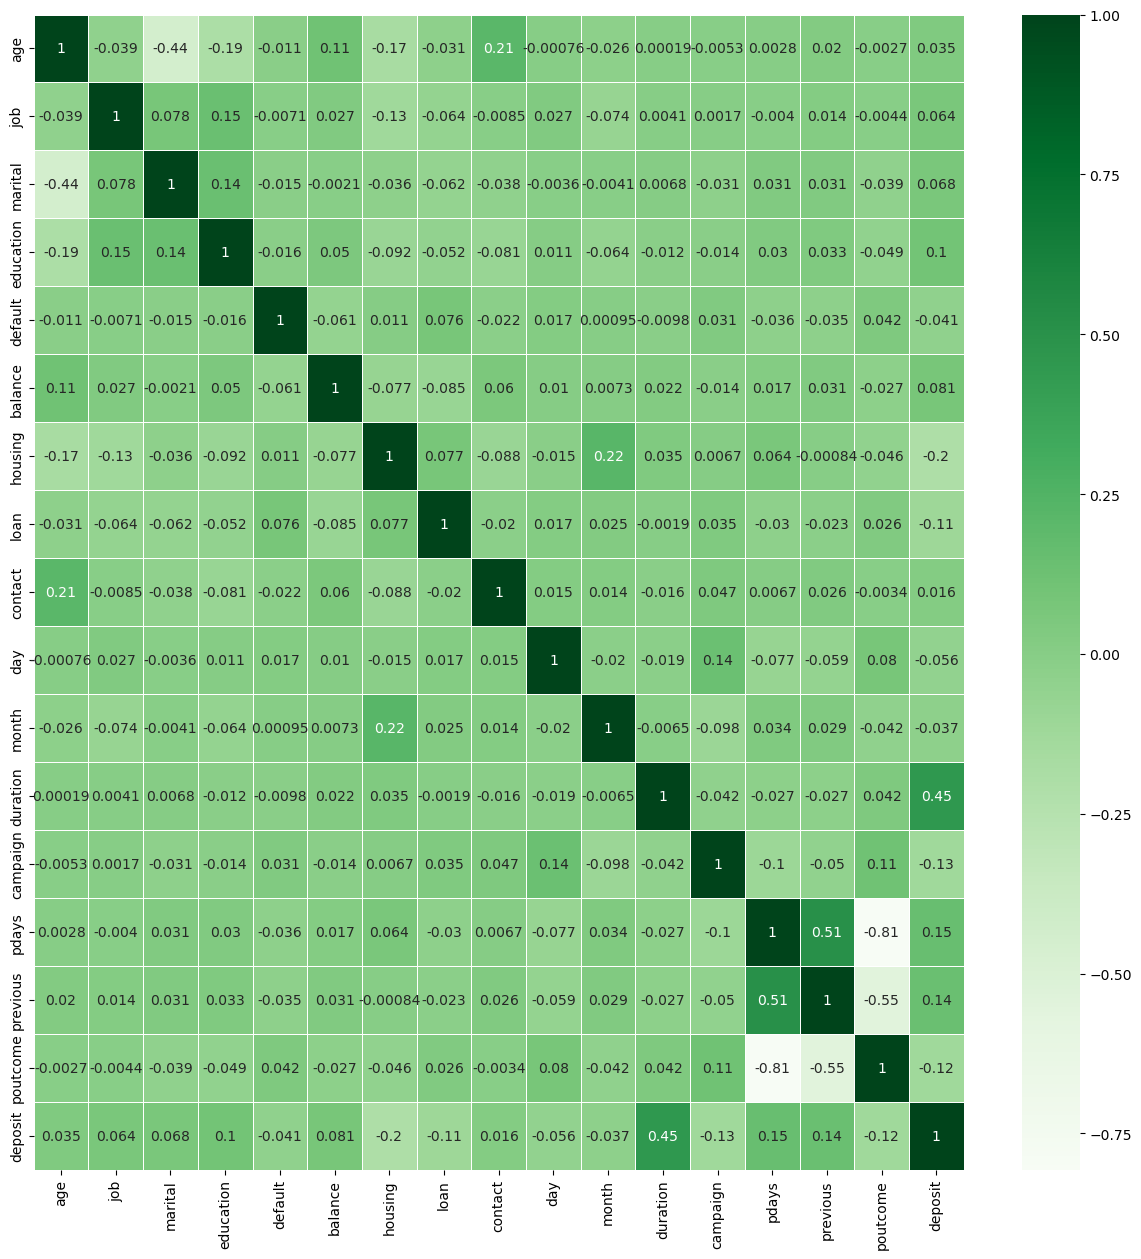

In [20]:
import seaborn as sns
corr_df = df.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr_df, 
                 cmap='Greens',
                 annot=True,
                 linewidths=0.5,
                 mask=False)

# Split Dependent and Independent Variables

In [21]:
X = df.drop(columns=["deposit"])
y = df[["deposit"]]

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)
X_train.head()

age  job  marital  education  default   balance  housing  loan  \
3955   0.129870    8        2          2        0  0.142963        0     0   
11150  0.207792    4        1          1        0  0.081794        0     0   
5173   0.389610   10        0          1        0  0.080045        0     0   
3017   0.454545    2        1          2        0  0.100033        0     0   
2910   0.454545    4        1          2        0  0.096206        0     0   

       contact       day  month  duration  campaign     pdays  previous  \
3955         0  0.300000     11  0.268110  0.064516  0.235088  0.051724   
11150        0  0.666667      1  0.080433  0.032258  0.000000  0.000000   
5173         0  0.300000      9  0.152617  0.000000  0.107602  0.017241   
3017         0  0.466667      2  0.089972  0.000000  0.000000  0.000000   
2910         0  0.333333      9  0.042279  0.032258  0.114620  0.120690   

       poutcome  
3955          0  
11150         3  
5173          2  
3017          3  
2910          2

# Train Model 

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# Predict 

In [24]:
y_pred = dt.predict(X_test)
pd.DataFrame(y_pred).value_counts()

0    1193
1    1040
Name: count, dtype: int64

# Evaluation

In [25]:
from sklearn.metrics import accuracy_score, classification_report
print(f"The accuracy of the model : {accuracy_score(y_pred,y_test)}")

The accuracy of the model : 0.7586206896551724


In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1193
           1       0.73      0.75      0.74      1040

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [27]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

feature_names = X_train.columns
class_names = [str(i) for i in dt.classes_]

dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=feature_names,  
                           class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data)  
tree_png = graph.create_png()  

# Display in notebook
Image(tree_png)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.642654 to fit



# the tree is too large to be able to proper visualisation due to large amount of features...

# Conclusion

### The model predicts the target with an accuracy of 0.75 which is good and the classification reports also confirms good trend with good score
### and with ~0.7 score which confirms that model predicts all the classes decent enough 